<a href="https://www.kaggle.com/code/kusumakar/programming-language-analysis?scriptVersionId=197901253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-programming-languages-2004-2024/Most Popular Programming Languages.csv


# Analysis of Programming Languages

In this notebook, we will be performing the following steps on the dataset:
1. Loading the data
2. Data Analysis - This step will analyse Null Values, Outliers, and datatypes
3. Data Cleansing - Removal of Nulls, Outliers if any,and conversion of datatypes.
4. Data Transformation - Standardization
5. Feature Analysis - Checks for  multicollinearity and feature selection.
6. Predictions - We will check different models, and compare their accuracy.

Let's go!

# Step 1: Load the Data

In [2]:
df = pd.read_csv("/kaggle/input/most-popular-programming-languages-2004-2024/Most Popular Programming Languages.csv")

In [3]:
# Check how the data looks like
df.head()

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01,30,98,96,76,100,6,1,9,2,78
1,2004-02,29,98,97,86,99,6,2,9,1,91
2,2004-03,28,100,100,87,97,5,2,9,2,99
3,2004-04,28,98,97,89,100,6,1,9,2,95
4,2004-05,28,91,99,84,92,6,2,10,3,86


# Step 2: Data Analysis

Let us check the data completeness, nulls and outliers. 

In [4]:
# Total Null Values in every column

df.isnull().sum()

Month                      0
Python Worldwide(%)        0
JavaScript Worldwide(%)    0
Java Worldwide(%)          0
C# Worldwide(%)            0
PhP Worldwide(%)           0
Flutter Worldwide(%)       0
React Worldwide(%)         0
Swift Worldwide(%)         0
TypeScript Worldwide(%)    0
Matlab Worldwide(%)        0
dtype: int64

####  It can inferred from the above results, that there is no Null in each column

In [5]:
# Check the data types

df.dtypes

Month                      object
Python Worldwide(%)         int64
JavaScript Worldwide(%)     int64
Java Worldwide(%)           int64
C# Worldwide(%)             int64
PhP Worldwide(%)            int64
Flutter Worldwide(%)        int64
React Worldwide(%)          int64
Swift Worldwide(%)          int64
TypeScript Worldwide(%)     int64
Matlab Worldwide(%)         int64
dtype: object

#### Except for Month, all the other columns are Integers

<Axes: >

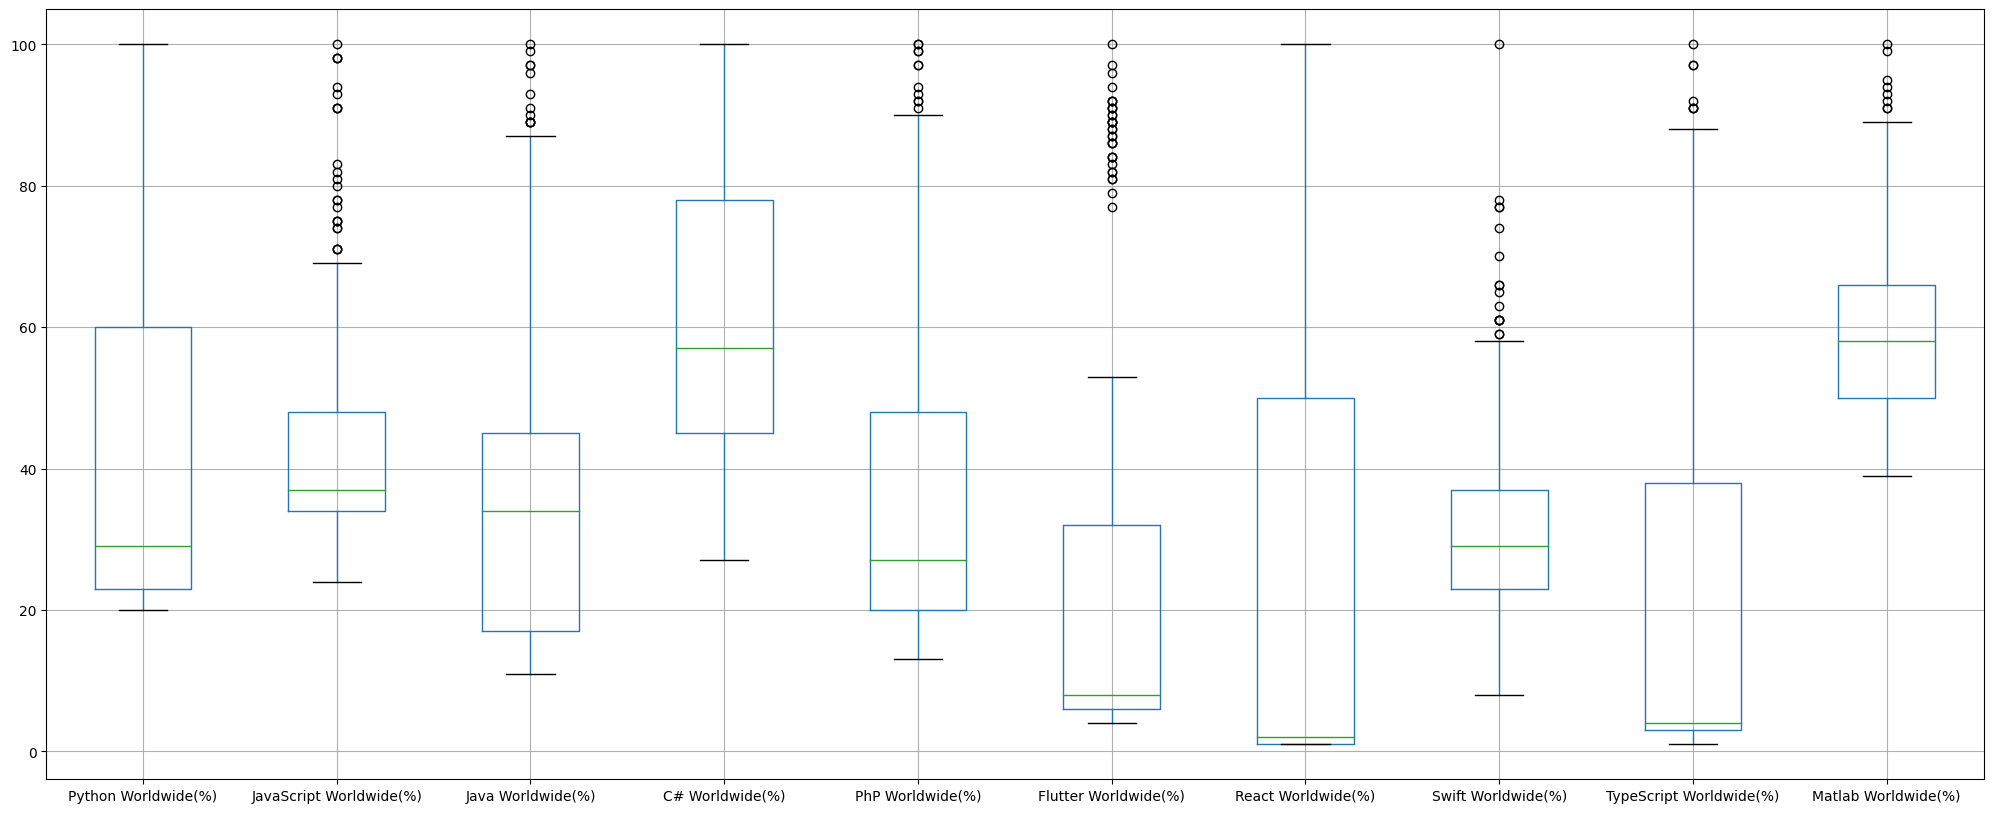

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)

df.boxplot()

#### From the boxplot above, there are no outliers in the Python, C# and  React Columns. However, others do have some outliers. We will remove the outliers now

To Remove the outliers, we will use inter-quartile range, and filter out the rows which lie beyond the boundaries

In [7]:
def remove_outliers_iqr(df):
    # Loop over each column in the DataFrame
    for col in df.select_dtypes(include=[ 'int64']).columns:
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows where the value is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


df_clean = remove_outliers_iqr(df)

<Axes: >

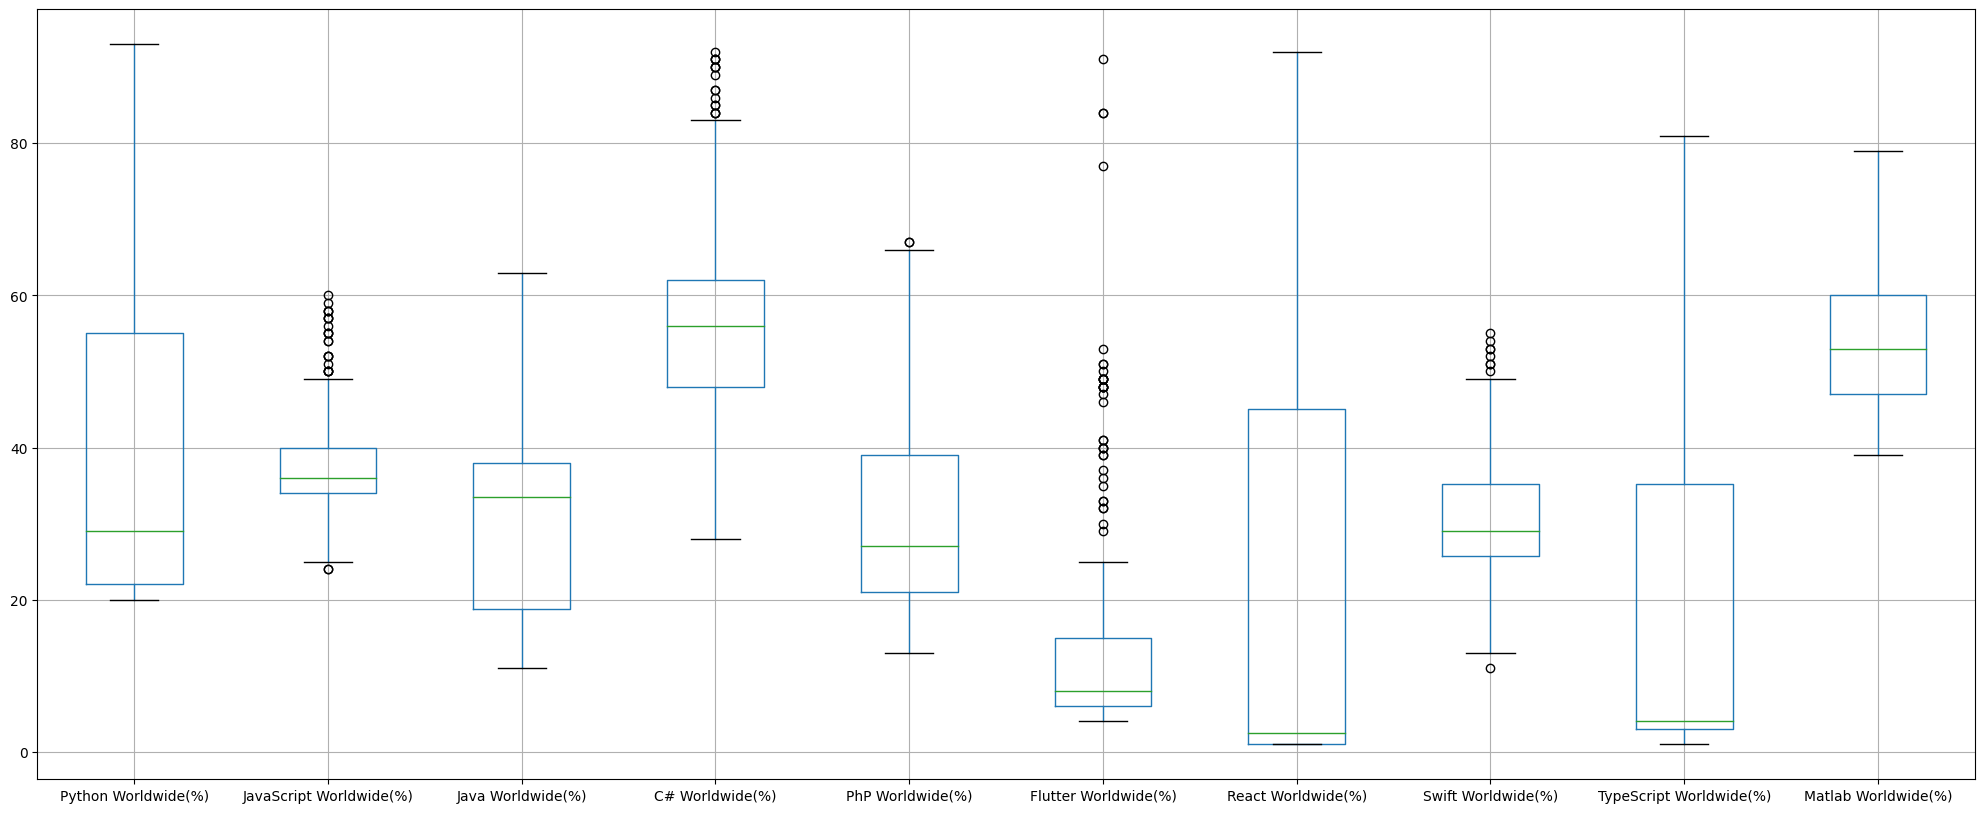

In [8]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
df_clean.boxplot()

### Let us plot the trend for all programming languages popularity over the years



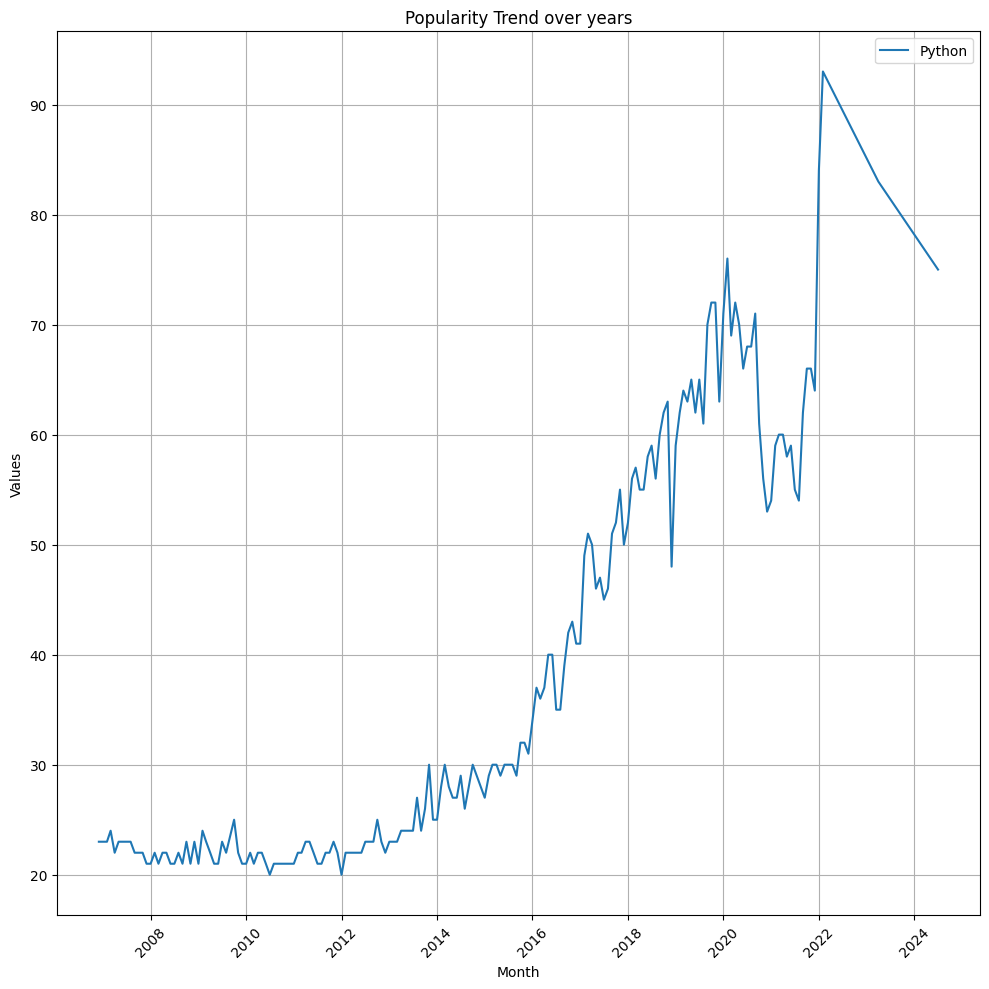

In [9]:
df_clean['Month'] = pd.to_datetime(df_clean['Month'])

# Plotting multiple lines
plt.figure(figsize=(10, 10))

# Plot each line for Value1, Value2, and Value3
plt.plot(df_clean['Month'], df_clean['Python Worldwide(%)'], label='Python' )


# Formatting the plot
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

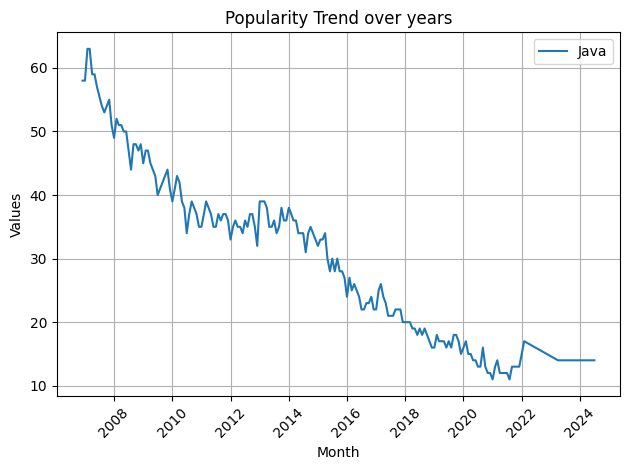

In [10]:
#Java Trend over Years

plt.plot(df_clean['Month'], df_clean['Java Worldwide(%)'], label='Java')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

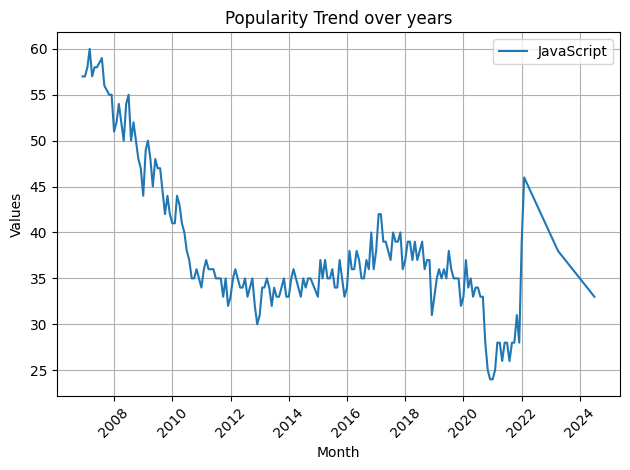

In [11]:
#JavaScript Trend over Years

plt.plot(df_clean['Month'], df_clean['JavaScript Worldwide(%)'], label='JavaScript')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

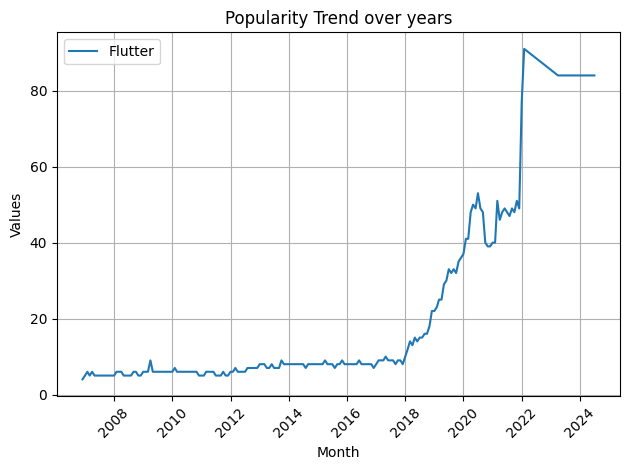

In [12]:
#Flutter Trend over Years

plt.plot(df_clean['Month'], df_clean['Flutter Worldwide(%)'], label='Flutter' )
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

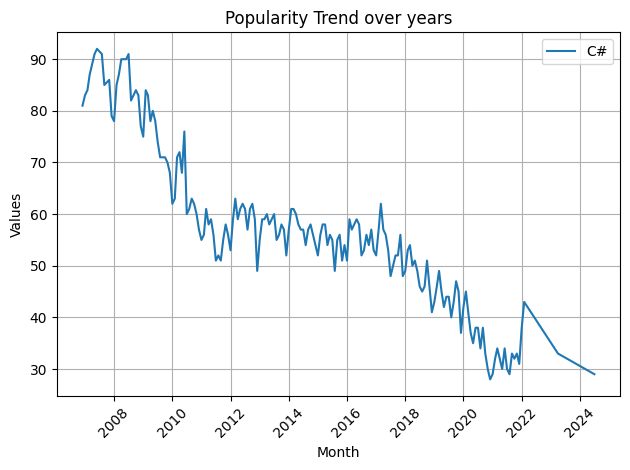

In [13]:
#C# Trend over Years

plt.plot(df_clean['Month'], df_clean['C# Worldwide(%)'], label='C#')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

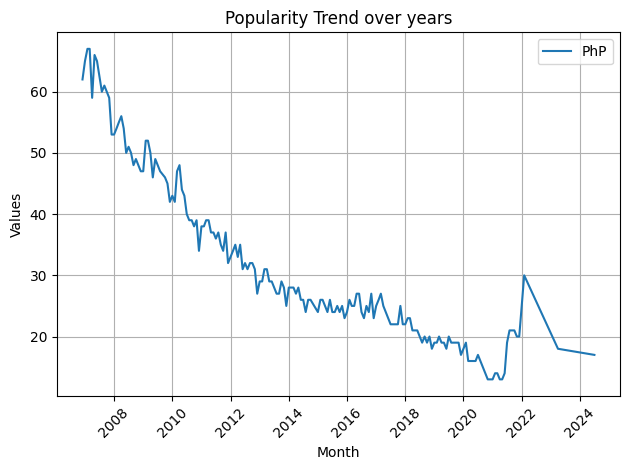

In [14]:
#PhP Trend over Years

plt.plot(df_clean['Month'], df_clean['PhP Worldwide(%)'], label='PhP')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

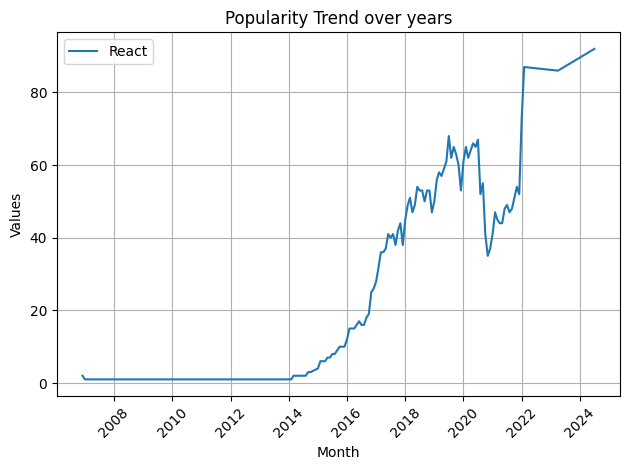

In [15]:
#React Trend over Years

plt.plot(df_clean['Month'], df_clean['React Worldwide(%)'], label='React' )
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

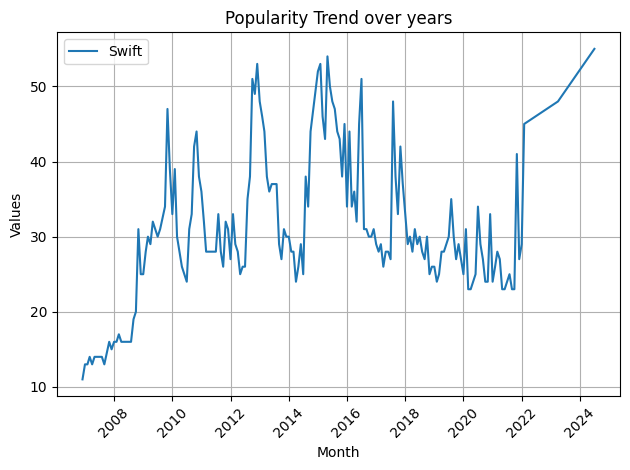

In [16]:
#Swift Trend over Years

plt.plot(df_clean['Month'], df_clean['Swift Worldwide(%)'], label='Swift')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

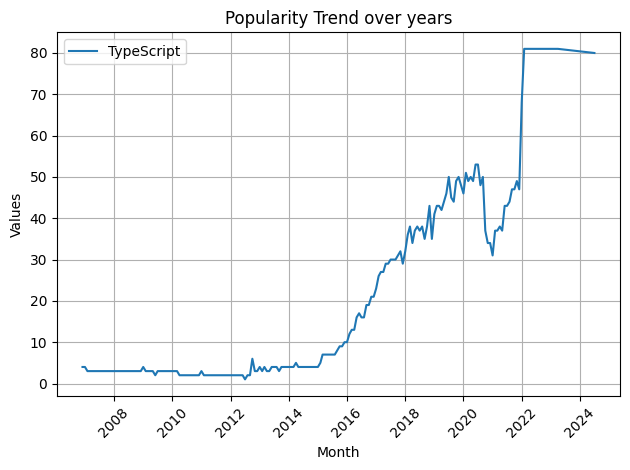

In [17]:
#TypeScript Trend over Years
plt.plot(df_clean['Month'], df_clean['TypeScript Worldwide(%)'], label='TypeScript')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

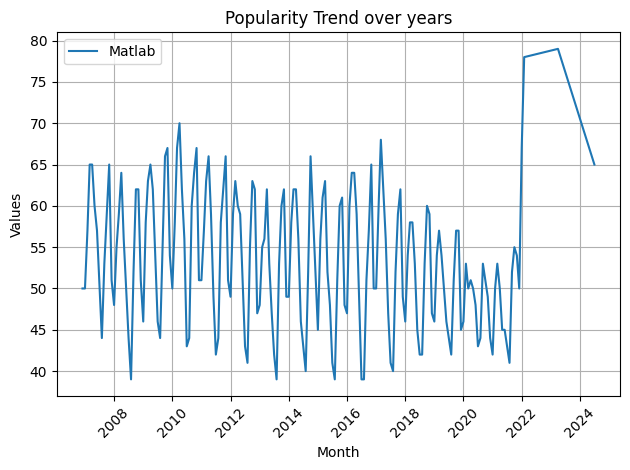

In [18]:
#Matlab Trend over Years

plt.plot(df_clean['Month'], df_clean['Matlab Worldwide(%)'], label='Matlab')
plt.title('Popularity Trend over years')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Show plot
plt.tight_layout()

### INFERENCES:

1. Popularity of Python, Flutter, React and TypeScript has shown a rise.
2. Popularity of Java, Javascript, C#, PhP has shown a decline
3. Popularity of Matlab and Swift has shown fluctuations across months

# Step 3 : Data Cleansing

We do not have any null. However, there is a string column- Month. Let us convert it to an integer type

In [19]:
df['Month']

# We will split it into year and month

0      2004-01
1      2004-02
2      2004-03
3      2004-04
4      2004-05
        ...   
244    2024-05
245    2024-06
246    2024-07
247    2024-08
248    2024-09
Name: Month, Length: 249, dtype: object

In [20]:
df_clean['Year']=pd.to_datetime(df_clean['Month']).dt.year
df_clean['Month']=pd.to_datetime(df_clean['Month']).dt.month

In [21]:
df_clean

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%),Year
35,12,23,57,58,81,62,4,2,11,4,50,2006
36,1,23,57,58,83,65,5,1,13,4,50,2007
37,2,23,58,63,84,67,6,1,13,3,57,2007
38,3,24,60,63,87,67,5,1,14,3,65,2007
39,4,22,57,59,89,59,6,1,13,3,65,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
215,12,64,28,13,31,20,49,52,27,47,50,2021
216,1,84,39,15,38,25,77,73,29,68,67,2022
217,2,93,46,17,43,30,91,87,45,81,78,2022
231,4,83,38,14,33,18,84,86,48,81,79,2023


# Step 4: Data Transformation : 

We should transform our dataframe in such a fashion, such that our model is able to answer to this question:

**Given a programming language, and a Month&Year, what will be its popularity?
**

Clearly, our dataframe should be re-framed to just these columns below:

Month, Year, Language, Popularity

Month, Year and Language will be the Independent Features
Popularity will be the Dependent Feature



In [22]:
df_clean

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%),Year
35,12,23,57,58,81,62,4,2,11,4,50,2006
36,1,23,57,58,83,65,5,1,13,4,50,2007
37,2,23,58,63,84,67,6,1,13,3,57,2007
38,3,24,60,63,87,67,5,1,14,3,65,2007
39,4,22,57,59,89,59,6,1,13,3,65,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
215,12,64,28,13,31,20,49,52,27,47,50,2021
216,1,84,39,15,38,25,77,73,29,68,67,2022
217,2,93,46,17,43,30,91,87,45,81,78,2022
231,4,83,38,14,33,18,84,86,48,81,79,2023


In [23]:
# We will iterate through all the columns, and will append them to one dataframe
df_temporary = []
x=list(df_clean.columns)
x.remove('Month')
x.remove('Year')
#x will have only programming languages columns
for col in x:
    df_temp = pd.DataFrame()
    df_temp['Month']=df_clean['Month']
    df_temp['Year']=df_clean['Year']
    df_temp['Language']=col
    df_temp['Popularity']=df_clean[col]
    
    df_temporary.append(df_temp)
    
df_new=pd.concat(df_temporary)
    

In [24]:
df_new

,Month,Year,Language,Popularity
35,12,2006,Python Worldwide(%),23
36,1,2007,Python Worldwide(%),23
37,2,2007,Python Worldwide(%),23
38,3,2007,Python Worldwide(%),24
39,4,2007,Python Worldwide(%),22
...,...,...,...,...
215,12,2021,Matlab Worldwide(%),50
216,1,2022,Matlab Worldwide(%),67
217,2,2022,Matlab Worldwide(%),78
231,4,2023,Matlab Worldwide(%),79


### We have now a proper dataframe that we can feed to our model. However, our model can only take Numerical Inputs. The column Language is a String. We should therefore Encode it.


### Let us first Remove "Worldwide(%)" from the values	

In [25]:
df_new['Language'] = df_new['Language'].apply(lambda x:x.split()[0])

In [26]:
df_new


,Month,Year,Language,Popularity
35,12,2006,Python,23
36,1,2007,Python,23
37,2,2007,Python,23
38,3,2007,Python,24
39,4,2007,Python,22
...,...,...,...,...
215,12,2021,Matlab,50
216,1,2022,Matlab,67
217,2,2022,Matlab,78
231,4,2023,Matlab,79


In [27]:
# Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_new['Language']=encoder.fit_transform(df_new[['Language']])


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
df_new

,Month,Year,Language,Popularity
35,12,2006,6,23
36,1,2007,6,23
37,2,2007,6,23
38,3,2007,6,24
39,4,2007,6,22
...,...,...,...,...
215,12,2021,4,50
216,1,2022,4,67
217,2,2022,4,78
231,4,2023,4,79


### We will use Decision Tree Regressor for predicting our values

# Model Training

1. We will split the data into training and test set
2. Post that will perform  Decision Tree Regression. We are using this algorithm since one of our columns are categorical( although we have encoded it).
3. With the model, we can predict future accuracy.


In [29]:
# 1.Split the data
from sklearn.model_selection import train_test_split

# extract dependent and independent variables

features = list(df_new.columns)

features.remove('Popularity')
X = df_new[features]
Y= df_new['Popularity']
print( " INDEPENDENT FEATURES - ",features)
print(" DEPENDENT FEATURES - Poplarity",)

 INDEPENDENT FEATURES -  ['Month', 'Year', 'Language']
 DEPENDENT FEATURES - Poplarity


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
dec = DecisionTreeRegressor()
dec.fit(X_train,y_train)
y_pred=dec.predict(X_test)
r2_score(y_pred,y_test)

0.9743104637091607

In [32]:
mean_squared_error(y_pred,y_test)

10.27111111111111

####  Great! Our model fits the data perfectly. R2 score above 0.95 is considered reliable. 

In [33]:
# Predicting the popularity of Python  in  January 2030

Let us create a test sample, for January 2030 for  Python 



In [34]:
# Our test data looks like this. So we need to create a record like this
X_test.head(3)

,Month,Year,Language
128,9,2014,6
172,5,2018,9
148,5,2016,8


In [35]:
python_test = pd.DataFrame()
python_test['Month']=[1]
python_test['Year']=[2030]
python_test['Language']=encoder.transform(['Python'])

In [36]:
python_test

,Month,Year,Language
0,1,2030,6


In [37]:
python_prediction = dec.predict(python_test)
print("By January 2030, popularity of python will be around ",python_prediction[0], "%")

By January 2030, popularity of python will be around  75.0 %


# THANKYOU FOR YOUR TIME !